# California 1980 housing price dataset 
> This notebook explores the dataset and used Logistic Regression to predict prices
- toc: true
- branch: master
- comments: true
- author: a
- categories: [jupyter]

# About 
This notebookl is a practise session of an housing dataset end to end machine learning example explained in  [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/). Here, we will download the dataset, analyze and Logisting Regression ML  

# Downloading 
The data is downloaded from [here](https://www.github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.tgz). This data is loaded to padas dataframe for further anlysis


## All imports and download function

In [1]:
#collapse-hide
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import requests
import tarfile
import pandas as pd

def get_housing_data():
    
    
    
    url = "https://www.github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.tgz"
    res = requests.get(url,allow_redirects=True)
    
    
    with open('housing.tgz', 'wb') as output_file:
        output_file.write(res.content)
    
    with tarfile.open('housing.tgz') as file_to_extract:
        print("Unzipping the file")
        file_to_extract.extractall()
    return pd.read_csv('housing.csv')
    



## downloading and loading dataset to pandas dataframe

In [2]:
#collapse-output
housing_df = get_housing_data()
housing_df.head()

Unzipping the file


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exlporing the dataset
All the columns on housing df has numerical values except for the column `ocean_proximity`. 'ocean_proximity' has a categorical value. We can see the dristribution of categorical values using `value_counts` method.


In [3]:
# hide
housing_df.shape

(20640, 10)

In [4]:
# retuns the count of all the values in a dataframe
housing_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
# hide
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


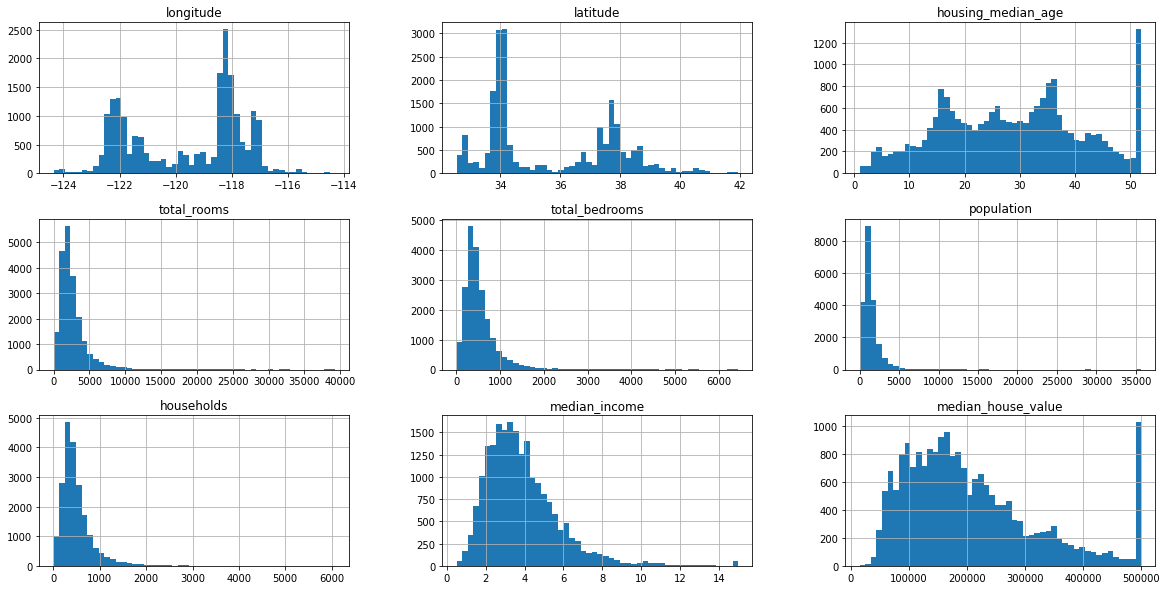

In [6]:
housing_df.hist(bins= 50, figsize=(20,10))
plt.show()

In [7]:
#hide
train_set, test_set = train_test_split(housing_df, train_size=0.2, random_state=42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9221,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278,58800.0,INLAND
10234,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732,165800.0,<1H OCEAN
4763,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214,139400.0,<1H OCEAN
9062,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500,107500.0,INLAND
1874,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806,107200.0,INLAND


In [8]:
#hide
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


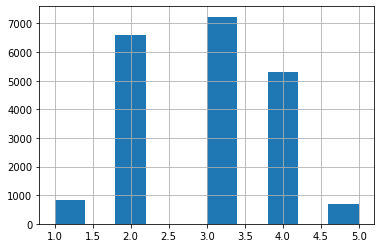

In [9]:
#  placing median income on 5 categorical bins to check the distribution of median income
housing_df['income_cat'] = pd.cut(
                                housing_df['median_income'],
                                bins = [0,1.5,3,4.5,8,np.inf],
                                labels=[1,2,3,4,5])
housing_df['income_cat'].hist()
plt.show()

In [10]:
#hide
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing_df, housing_df['income_cat']):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set =  housing_df.loc[test_index]

In [11]:
#hide
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,1
628,-122.19,37.71,36.0,361.0,69.0,158.0,58.0,5.5461,262500.0,NEAR BAY,4
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,150700.0,<1H OCEAN,2
13897,-116.29,34.18,15.0,4203.0,966.0,1756.0,695.0,2.1820,60800.0,INLAND,2
399,-122.29,37.89,52.0,2269.0,380.0,1004.0,371.0,5.1696,261400.0,NEAR BAY,4


In [12]:
#hide
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN
628,-122.19,37.71,36.0,361.0,69.0,158.0,58.0,5.5461,262500.0,NEAR BAY
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,150700.0,<1H OCEAN
13897,-116.29,34.18,15.0,4203.0,966.0,1756.0,695.0,2.1820,60800.0,INLAND
399,-122.29,37.89,52.0,2269.0,380.0,1004.0,371.0,5.1696,261400.0,NEAR BAY


In [13]:
#hide
# only taking traininf set 
housing_train = strat_train_set.copy()


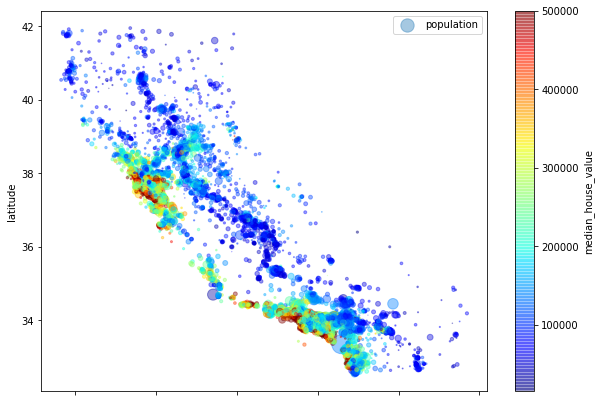

In [14]:
housing_train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing_train['population']/100, label='population', figsize = (10,7),
            c="median_house_value", cmap = plt.get_cmap('jet'), colorbar=True,
            )
plt.show()

In [15]:
corr_matrix = housing_train.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924546,-0.110082,0.045991,0.074160,0.105754,0.060060,-0.020953,-0.051163
latitude,-0.924546,1.000000,0.011207,-0.037582,-0.070688,-0.114037,-0.075539,-0.074328,-0.139656
housing_median_age,-0.110082,0.011207,1.000000,-0.361423,-0.321970,-0.295217,-0.303229,-0.115187,0.108659
total_rooms,0.045991,-0.037582,-0.361423,1.000000,0.929630,0.855148,0.917846,0.197785,0.135239
total_bedrooms,0.074160,-0.070688,-0.321970,0.929630,1.000000,0.875671,0.979810,-0.009586,0.048639
population,0.105754,-0.114037,-0.295217,0.855148,0.875671,1.000000,0.904342,0.003136,-0.025506
households,0.060060,-0.075539,-0.303229,0.917846,0.979810,0.904342,1.000000,0.011039,0.065744
median_income,-0.020953,-0.074328,-0.115187,0.197785,-0.009586,0.003136,0.011039,1.000000,0.687564
median_house_value,-0.051163,-0.139656,0.108659,0.135239,0.048639,-0.025506,0.065744,0.687564,1.000000


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

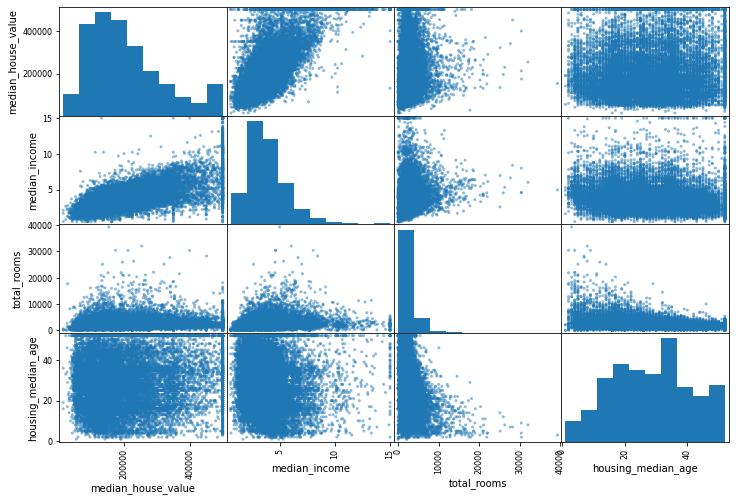

In [16]:

from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing_train[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

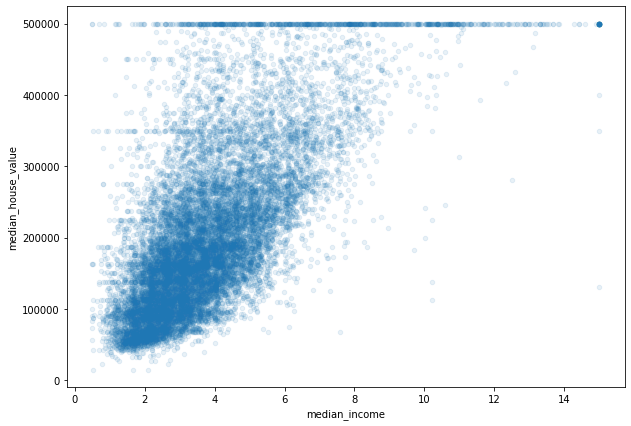

In [17]:

# taking one 
housing_train.plot(kind='scatter', x='median_income',y='median_house_value', alpha=0.1, figsize = (10,7))

In [18]:

housing_train['rooms_per_household'] = housing_train['total_rooms']/housing_train['households']
housing_train['bedrooms_per_room'] = housing_train['total_bedrooms']/housing_train['total_rooms']
housing_train['population_per_households'] = housing_train['population']/housing_train['households']
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_households
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN,2.373272,0.444660,12.396313
628,-122.19,37.71,36.0,361.0,69.0,158.0,58.0,5.5461,262500.0,NEAR BAY,6.224138,0.191136,2.724138
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,150700.0,<1H OCEAN,3.582418,0.307260,3.062271
13897,-116.29,34.18,15.0,4203.0,966.0,1756.0,695.0,2.1820,60800.0,INLAND,6.047482,0.229836,2.526619
399,-122.29,37.89,52.0,2269.0,380.0,1004.0,371.0,5.1696,261400.0,NEAR BAY,6.115903,0.167475,2.706199


In [19]:

corr_matrix2 = housing_train.corr()
corr_matrix2['median_house_value'].sort_values(ascending=False)


median_house_value           1.000000
median_income                0.687564
rooms_per_household          0.145639
total_rooms                  0.135239
housing_median_age           0.108659
households                   0.065744
total_bedrooms               0.048639
population_per_households   -0.021867
population                  -0.025506
longitude                   -0.051163
latitude                    -0.139656
bedrooms_per_room           -0.260946
Name: median_house_value, dtype: float64

In [20]:

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,<1H OCEAN
628,-122.19,37.71,36.0,361.0,69.0,158.0,58.0,5.5461,NEAR BAY
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685,<1H OCEAN
13897,-116.29,34.18,15.0,4203.0,966.0,1756.0,695.0,2.1820,INLAND
399,-122.29,37.89,52.0,2269.0,380.0,1004.0,371.0,5.1696,NEAR BAY


In [21]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')


In [22]:

# can only use median impputer with numerical data, so dropping ocean_proximity
housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.52   ,   34.26   ,   29.     , 2121.     ,  433.     ,
       1163.     ,  408.     ,    3.54155])

In [23]:

housing_num.median().values

array([-118.52   ,   34.26   ,   29.     , 2121.     ,  433.     ,
       1163.     ,  408.     ,    3.54155])

In [24]:

housing_imp = imputer.transform(housing_num)
housing_train_set = pd.DataFrame(housing_imp, columns=housing_num.columns,index=housing_num.index)
housing_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999
628,-122.19,37.71,36.0,361.0,69.0,158.0,58.0,5.5461
4760,-118.35,34.04,36.0,1956.0,601.0,1672.0,546.0,1.8685
13897,-116.29,34.18,15.0,4203.0,966.0,1756.0,695.0,2.1820
399,-122.29,37.89,52.0,2269.0,380.0,1004.0,371.0,5.1696


In [25]:

# dealing with categorical or text attributes
housing_catg = housing[['ocean_proximity']]
housing_catg.head()

,ocean_proximity
4861,<1H OCEAN
628,NEAR BAY
4760,<1H OCEAN
13897,INLAND
399,NEAR BAY


In [26]:

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_catg_encoded = ordinal_encoder.fit_transform(housing_catg)
housing_catg_encoded[:10]

array([[0.],
       [3.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]])

In [27]:

ordinal_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [28]:

from sklearn.preprocessing import OneHotEncoder
catg_encoder = OneHotEncoder()
housing_catg_1hot = catg_encoder.fit_transform(housing_catg)
housing_catg_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [29]:

housing_catg_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [30]:

catg_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]